In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell      #Print all cell outputs
InteractiveShell.ast_node_interactivity = "all"

print("Modules imported")

Modules imported


/root/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

In [2]:
data=pd.read_csv(r'Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
print('Number of null values in each column are:')
data.isnull().sum()

Number of null values in each column are:


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Preprocessing

In [7]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
data['size'].unique()
data['area_type'].unique()
data['location'].unique()
data['society'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [9]:
len(data[data['size']=='3 BHK'])
len(data[data['size']=='43 Bedroom'])
data[data['size']=='43 Bedroom']

4310

1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0


In [10]:
data.drop(data[data['size']=='43 Bedroom'].index,inplace=True)
data=data.reset_index(drop=True)

In [11]:
data['location'].fillna('unknown',inplace=True)

data['society'].fillna('unknown',inplace=True)


In [12]:
#Most frequent values in columns location and society
data['location'].value_counts()[:6].index.tolist()
data['society'].value_counts()[:6].index.tolist()

['Whitefield',
 'Sarjapur  Road',
 'Electronic City',
 'Kanakpura Road',
 'Thanisandra',
 'Yelahanka']

['unknown', 'GrrvaGr', 'PrarePa', 'Prtates', 'Sryalan', 'GMown E']

In [13]:
data=data.dropna(subset=['size']).reset_index(drop=True)       #removing rows where size = nan

In [14]:
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

In [15]:
import sys
tmp1=np.array(data['total_sqft'].unique())
np.set_printoptions(threshold=sys.maxsize)
print(tmp1)

['1056' '2600' '1440' '1521' '1200' '1170' '2732' '3300' '1310' '1020'
 '1800' '2785' '1000' '1100' '2250' '1175' '1180' '1540' '2770' '600'
 '1755' '2800' '1767' '510' '1250' '660' '1610' '1151' '1025'
 '2100 - 2850' '1075' '1760' '1693' '1925' '700' '1070' '1724' '1290'
 '1143' '1296' '1254' '1330.74' '970' '1459' '800' '869' '1270' '1670'
 '2010' '1185' '1600' '3010 - 3410' '1500' '1407' '840' '4395' '845'
 '5700' '1160' '3000' '1140' '1220' '1350' '1005' '500' '1358' '1569'
 '1240' '2089' '1206' '1150' '2511' '460' '4400' '1660' '2957 - 3450'
 '1326' '1325' '1499' '1665' '708' '1060' '710' '1450' '2894' '1330'
 '2502' '650' '2400' '1007' '966' '1630' '1640' '782' '1260' '1413' '1116'
 '1530' '3700' '2497' '1436' '276' '1427' '2061' '3067 - 8156' '2650'
 '1282' '1050' '945' '950' '1870' '880' '1535' '1360' '1042 - 1105' '1280'
 '5000' '3050' '1563.05' '1167' '4000' '1828' '890' '1612' '1034' '1710'
 '957' '2795' '1125' '1735' '2050' '3750' '1063' '1904' '4200' '2000'
 '1145 - 1340' 

In [16]:
# Converting all non-sq.ft data to sq.ft and float type

data['total_sqft']=data['total_sqft'].str.replace('Sq. Meter',',10.7639').str.replace('Perch',',272.25').str.replace('Sq. Yards',',9').str.replace('Acres',',43560')
data['total_sqft']=data['total_sqft'].str.replace('Cents',',435.6').str.replace('Guntha',',1089.1').str.replace('Grounds',',2400')


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
tmp2=np.array(data['total_sqft'].unique())
print('All non sq.ft values are denoted by (value,conversion unit to sq.ft)')
print("")
print(tmp2)

All non sq.ft values are denoted by (value,conversion unit to sq.ft)

['1056' '2600' '1440' '1521' '1200' '1170' '2732' '3300' '1310' '1020'
 '1800' '2785' '1000' '1100' '2250' '1175' '1180' '1540' '2770' '600'
 '1755' '2800' '1767' '510' '1250' '660' '1610' '1151' '1025'
 '2100 - 2850' '1075' '1760' '1693' '1925' '700' '1070' '1724' '1290'
 '1143' '1296' '1254' '1330.74' '970' '1459' '800' '869' '1270' '1670'
 '2010' '1185' '1600' '3010 - 3410' '1500' '1407' '840' '4395' '845'
 '5700' '1160' '3000' '1140' '1220' '1350' '1005' '500' '1358' '1569'
 '1240' '2089' '1206' '1150' '2511' '460' '4400' '1660' '2957 - 3450'
 '1326' '1325' '1499' '1665' '708' '1060' '710' '1450' '2894' '1330'
 '2502' '650' '2400' '1007' '966' '1630' '1640' '782' '1260' '1413' '1116'
 '1530' '3700' '2497' '1436' '276' '1427' '2061' '3067 - 8156' '2650'
 '1282' '1050' '945' '950' '1870' '880' '1535' '1360' '1042 - 1105' '1280'
 '5000' '3050' '1563.05' '1167' '4000' '1828' '890' '1612' '1034' '1710'
 '957' '2795' '

In [18]:
#Taking mean of range of values given and converting non sq.ft values to sq.ft

from statistics import mean
from numpy import prod
for i in range(len(data['total_sqft'])):
    
    if (data.loc[i,'total_sqft'].find('-')!=-1):
        tmp5=[float(item) for item in data.loc[i,'total_sqft'].split(' - ')]
        data.loc[i,'total_sqft']=mean(tmp5)
    
    elif(data.loc[i,'total_sqft'].find(',')!=-1):
        tmp5=[float(item) for item in data.loc[i,'total_sqft'].split(',')]
        data.loc[i,'total_sqft']=prod(tmp5)

In [19]:
tmp3=np.array(data['total_sqft'].unique())
print(tmp3)

['1056' '2600' '1440' '1521' '1200' '1170' '2732' '3300' '1310' '1020'
 '1800' '2785' '1000' '1100' '2250' '1175' '1180' '1540' '2770' '600'
 '1755' '2800' '1767' '510' '1250' '660' '1610' '1151' '1025' 2475.0
 '1075' '1760' '1693' '1925' '700' '1070' '1724' '1290' '1143' '1296'
 '1254' '1330.74' '970' '1459' '800' '869' '1270' '1670' '2010' '1185'
 '1600' 3210.0 '1500' '1407' '840' '4395' '845' '5700' '1160' '3000'
 '1140' '1220' '1350' '1005' '500' '1358' '1569' '1240' '2089' '1206'
 '1150' '2511' '460' '4400' '1660' 3203.5 '1326' '1325' '1499' '1665'
 '708' '1060' '710' '1450' '2894' '1330' '2502' '650' '2400' '1007' '966'
 '1630' '1640' '782' '1260' '1413' '1116' '1530' '3700' '2497' '1436'
 '276' '1427' '2061' 5611.5 '2650' '1282' '1050' '945' '950' '1870' '880'
 '1535' '1360' 1073.5 '1280' '5000' '3050' '1563.05' '1167' '4000' '1828'
 '890' '1612' '1034' '1710' '957' '2795' '1125' '1735' '2050' '3750'
 '1063' '1904' '4200' '2000' 1242.5 '1425' '1470' '1300' '450' '1152'
 '1550' '

In [20]:
data['size']=data['size'].str.replace(r'\D+','').astype(float)
data.rename(columns={'size':'BHK'},inplace=True)
data.head()

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,unknown,1200,2.0,1.0,51.00


### Estimating NaN values of bath using regression on BHK, total_sqft and price

In [21]:
bath_nans=data[data['bath'].isna()]     #extracting rows with na values in bath column
bath_data=data[data['bath'].notna()]
bath_data=bath_data.reset_index(drop=True)
bath_nans=bath_nans.reset_index(drop=True)

bath_nans.head()
bath_data.head()

,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
0,Built-up Area,20-Feb,Devanahalli,4.0,BrereAt,3210.0,NaN,NaN,192.00
1,Built-up Area,18-Oct,Hennur Road,4.0,Gollela,3203.5,NaN,NaN,224.50
2,Super built-up Area,19-Dec,Devanahalli,3.0,Jurdsig,1630.0,NaN,NaN,74.82
3,Super built-up Area,21-Dec,Kanakpura Road,1.0,PrarePa,525,NaN,NaN,21.53
4,Super built-up Area,18-Dec,JP Nagar,5.0,Pehtsa,5520.0,NaN,NaN,375.00


,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,unknown,1200,2.0,1.0,51.00


In [22]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

xtrain=bath_data[['BHK','total_sqft','price']]
ytrain=bath_data['bath']

xpred=bath_nans[['BHK','total_sqft','price']]
xtrain.head()

,BHK,total_sqft,price
0,2.0,1056,39.07
1,4.0,2600,120.00
2,3.0,1440,62.00
3,3.0,1521,95.00
4,2.0,1200,51.00


In [23]:
clf.fit(xtrain,ytrain)

bath_hat=clf.predict(xpred)

#bath_hat=[round(x) for x in bath_hat]

LinearRegression()

In [24]:
bath_nans['bath']=bath_hat
bath_nans.head()

,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
0,Built-up Area,20-Feb,Devanahalli,4.0,BrereAt,3210.0,3.830479,NaN,192.00
1,Built-up Area,18-Oct,Hennur Road,4.0,Gollela,3203.5,3.865247,NaN,224.50
2,Super built-up Area,19-Dec,Devanahalli,3.0,Jurdsig,1630.0,2.826325,NaN,74.82
3,Super built-up Area,21-Dec,Kanakpura Road,1.0,PrarePa,525,1.011945,NaN,21.53
4,Super built-up Area,18-Dec,JP Nagar,5.0,Pehtsa,5520.0,4.905124,NaN,375.00


In [25]:
hprices=pd.concat([bath_nans,bath_data])
hprices=hprices.reset_index(drop=True)
hprices.head()

,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
0,Built-up Area,20-Feb,Devanahalli,4.0,BrereAt,3210.0,3.830479,NaN,192.00
1,Built-up Area,18-Oct,Hennur Road,4.0,Gollela,3203.5,3.865247,NaN,224.50
2,Super built-up Area,19-Dec,Devanahalli,3.0,Jurdsig,1630.0,2.826325,NaN,74.82
3,Super built-up Area,21-Dec,Kanakpura Road,1.0,PrarePa,525,1.011945,NaN,21.53
4,Super built-up Area,18-Dec,JP Nagar,5.0,Pehtsa,5520.0,4.905124,NaN,375.00


### Estimating NaN values of balcony using regression on BHK, total_sqft and price

In [26]:
balc_nans=hprices[hprices['balcony'].isna()]     #extracting rows with na values in bath column
balc_data=hprices[hprices['balcony'].notna()]
balc_data=balc_data.reset_index(drop=True)
balc_nans=balc_nans.reset_index(drop=True)

balc_nans.head()
balc_nans.shape
balc_data.head()

,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
0,Built-up Area,20-Feb,Devanahalli,4.0,BrereAt,3210.0,3.830479,NaN,192.00
1,Built-up Area,18-Oct,Hennur Road,4.0,Gollela,3203.5,3.865247,NaN,224.50
2,Super built-up Area,19-Dec,Devanahalli,3.0,Jurdsig,1630.0,2.826325,NaN,74.82
3,Super built-up Area,21-Dec,Kanakpura Road,1.0,PrarePa,525,1.011945,NaN,21.53
4,Super built-up Area,18-Dec,JP Nagar,5.0,Pehtsa,5520.0,4.905124,NaN,375.00


(593, 9)

,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,unknown,1200,2.0,1.0,51.00


In [27]:
x2train=balc_data[['BHK','total_sqft','price']]
y2train=balc_data['balcony']

x2pred=balc_nans[['BHK','total_sqft','price']]
x2train.head()

,BHK,total_sqft,price
0,2.0,1056,39.07
1,4.0,2600,120.00
2,3.0,1440,62.00
3,3.0,1521,95.00
4,2.0,1200,51.00


In [28]:
#KNN regression
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=6)
knr.fit(x2train,y2train)
balc_knrhat=knr.predict(x2pred)

KNeighborsRegressor(n_neighbors=6)

In [29]:
balc_nans['balcony']=balc_knrhat
balc_nans.head()

,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
0,Built-up Area,20-Feb,Devanahalli,4.0,BrereAt,3210.0,3.830479,2.0,192.00
1,Built-up Area,18-Oct,Hennur Road,4.0,Gollela,3203.5,3.865247,2.0,224.50
2,Super built-up Area,19-Dec,Devanahalli,3.0,Jurdsig,1630.0,2.826325,2.0,74.82
3,Super built-up Area,21-Dec,Kanakpura Road,1.0,PrarePa,525,1.011945,1.0,21.53
4,Super built-up Area,18-Dec,JP Nagar,5.0,Pehtsa,5520.0,4.905124,1.5,375.00


In [30]:
hprices=pd.concat([balc_nans,balc_data])
hprices=hprices.reset_index(drop=True)

hprices['area_type']=hprices['area_type'].str.lower()
hprices['location']=hprices['location'].str.lower()
hprices['society']=hprices['society'].str.lower()

In [31]:
print('Number of null values in each column are:')
hprices.isnull().sum()
print('')
print('Final dataset after preprocessing is')
hprices.head()
hprices.shape

Number of null values in each column are:


area_type       0
availability    0
location        0
BHK             0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


Final dataset after preprocessing is


,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
0,built-up area,20-Feb,devanahalli,4.0,brereat,3210.0,3.830479,2.0,192.00
1,built-up area,18-Oct,hennur road,4.0,gollela,3203.5,3.865247,2.0,224.50
2,super built-up area,19-Dec,devanahalli,3.0,jurdsig,1630.0,2.826325,2.0,74.82
3,super built-up area,21-Dec,kanakpura road,1.0,prarepa,525,1.011945,1.0,21.53
4,super built-up area,18-Dec,jp nagar,5.0,pehtsa,5520.0,4.905124,1.5,375.00


(13303, 9)

In [32]:
hprices['total_sqft']=hprices['total_sqft'].astype(float)
hprices.dtypes

area_type        object
availability     object
location         object
BHK             float64
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [33]:
cols=['price','area_type','availability','location','BHK','society','total_sqft','bath','balcony']
hprices=hprices[cols]

# Feature Engineering and train-test split

In [34]:
# Dropping irrelavant columns 
hprices.drop(columns=['availability'],inplace=True)

# Label Encoding categorical variables and adding dummy variable for 'area_type'
from sklearn.preprocessing import LabelEncoder
label_enco=LabelEncoder()

hprices['location']=label_enco.fit_transform(hprices['location'])
hprices['society']=label_enco.fit_transform(hprices['society'])

hprices=pd.get_dummies(hprices,columns=['area_type'],drop_first=True)

In [35]:
hprices.columns=['price',
 'location',
 'BHK',
 'society',
 'total_sqft',
 'bath',
 'balcony',
 'area_type_carpet_area',
 'area_type_plot_area',
 'area_type_super_built_up_area']

hprices.head()
hprices.shape

,price,location,BHK,society,total_sqft,bath,balcony,area_type_carpet_area,area_type_plot_area,area_type_super_built_up_area
0,192.00,372,4.0,314,3210.0,3.830479,2.0,0,0,0
1,224.50,524,4.0,757,3203.5,3.865247,2.0,0,0,0
2,74.82,372,3.0,977,1630.0,2.826325,2.0,0,0,1
3,21.53,664,1.0,1519,525.0,1.011945,1.0,0,0,1
4,375.00,614,5.0,1490,5520.0,4.905124,1.5,0,0,1


(13303, 10)

##### area_type feature:
    area_type is Carpet Area if area_type_Carpet Area=1, area_type_Plot Area=0, area_type_Super built-up Area=0
    area_type is Plot Area if area_type_Carpet Area=0, area_type_Plot Area=1, area_type_Super built-up Area=0
    area_type is Super built-up Area if area_type_Carpet Area=0, area_type_Plot Area=0, area_type_Super built-up Area=1
    area_type is Built-up Area if area_type_Carpet Area=0, area_type_Plot Area=0, area_type_Super built-up Area=0
    

### Features and target variable

In [36]:
X=hprices.iloc[:,1:]   #all features except price
Y=hprices.iloc[:,0]    #price

In [37]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
fimp=ExtraTreesRegressor()
fimp.fit(X,Y)

print(fimp.feature_importances_)

ExtraTreesRegressor()

[0.09226669 0.10474574 0.04994848 0.44436238 0.15916024 0.06820908
 0.00052661 0.06641359 0.01436719]


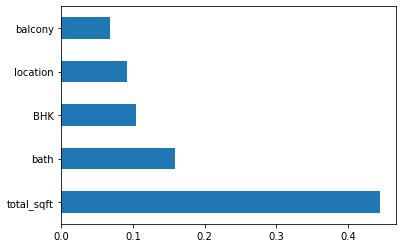

In [38]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(fimp.feature_importances_, index=X.columns)
# considering top 5 important features
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [39]:
#splitting the data
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.25,random_state=6)

# Fitting and Evaluating different models

In [40]:
# Linear Regression

lin_prices=linear_model.LinearRegression()
lin_prices.fit(xtrain,ytrain)

yhat_lin=lin_prices.predict(xtest)

LinearRegression()

In [41]:
#metrics
from sklearn import metrics

mae_lin=metrics.mean_absolute_error(ytest,yhat_lin)
print('Mean absolute error is',mae_lin)

rmse_lin=metrics.mean_squared_error(ytest,yhat_lin,squared=False)
print('RMSE is',rmse_lin)

mape_lin=metrics.mean_absolute_percentage_error(ytest,yhat_lin)
print('MAPE is', mape_lin)

r2_lin=lin_prices.score(xtest,ytest)
print('R2 score is',r2_lin)


Mean absolute error is 56.249670161275105
RMSE is 132.1091889272765
MAPE is 0.5315873611739108
R2 score is 0.17767942102701617


In [42]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [43]:
# Degree=2

model2=Pipeline([('poly',PolynomialFeatures(degree=2)),('linear', linear_model.LinearRegression())])
model2=model2.fit(xtrain,ytrain)

yhat_pol2=model2.predict(xtest)

In [44]:
#metrics

mae_pol2=metrics.mean_absolute_error(ytest,yhat_pol2)
print('Mean absolute error is',mae_pol2)

rmse_pol2=metrics.mean_squared_error(ytest,yhat_pol2,squared=False)
print('RMSE is',rmse_pol2)

mape_pol2=metrics.mean_absolute_percentage_error(ytest,yhat_pol2)
print('MAPE is', mape_pol2)

r2_pol2=lin_prices.score(xtest,ytest)
print('R2 score is',r2_pol2)


Mean absolute error is 84.19472085958876
RMSE is 1540.0161269018797
MAPE is 1.2557620940042913
R2 score is 0.17767942102701617


In [45]:
# Degree=3

model3=Pipeline([('poly',PolynomialFeatures(degree=3)),('linear', linear_model.LinearRegression())])
model3=model3.fit(xtrain,ytrain)

yhat_pol3=model3.predict(xtest)

In [46]:
#metrics

mae_pol3=metrics.mean_absolute_error(ytest,yhat_pol3)
print('Mean absolute error is',mae_pol2)

rmse_pol3=metrics.mean_squared_error(ytest,yhat_pol3,squared=False)
print('RMSE is',rmse_pol3)

mape_pol3=metrics.mean_absolute_percentage_error(ytest,yhat_pol3)
print('MAPE is', mape_pol3)

r2_pol3=lin_prices.score(xtest,ytest)
print('R2 score is',r2_pol3)


Mean absolute error is 84.19472085958876
RMSE is 155843.9578579355
MAPE is 91.064769335825
R2 score is 0.17767942102701617


In [47]:
# Ridge regression

ridge_prices=linear_model.Ridge()
ridge_prices.fit(xtrain,ytrain)

yhat_ridge=ridge_prices.predict(xtest)

Ridge()

In [48]:
#metrics

mae_r=metrics.mean_absolute_error(ytest,yhat_ridge)
print('Mean absolute error is',mae_r)

rmse_r=metrics.mean_squared_error(ytest,yhat_ridge,squared=False)
print('RMSE is',rmse_r)

mape_r=metrics.mean_absolute_percentage_error(ytest,yhat_ridge)
print('MAPE is', mape_r)

r2_r=ridge_prices.score(xtest,ytest)
print('R2 score is',r2_r)


Mean absolute error is 56.247238076545635
RMSE is 132.11012513456862
MAPE is 0.5315647729556252
R2 score is 0.1776677660428838


In [49]:
# Lasso regression

lasso_prices=linear_model.Lasso()
lasso_prices.fit(xtrain,ytrain)

yhat_lasso=lasso_prices.predict(xtest)

Lasso()

In [50]:
#metrics

mae_l=metrics.mean_absolute_error(ytest,yhat_lasso)
print('Mean absolute error is',mae_l)

rmse_l=metrics.mean_squared_error(ytest,yhat_lasso,squared=False)
print('RMSE is',rmse_l)

mape_l=metrics.mean_absolute_percentage_error(ytest,yhat_lasso)
print('MAPE is', mape_l)

r2_l=lasso_prices.score(xtest,ytest)
print('R2 score is',r2_l)


Mean absolute error is 55.74272822320832
RMSE is 132.38188445359634
MAPE is 0.5247892095839983
R2 score is 0.17428110206615277


In [51]:
# Elastic Net Regression

en_prices=linear_model.ElasticNet()
en_prices.fit(xtrain,ytrain)

yhat_en=en_prices.predict(xtest)

ElasticNet()

In [52]:
#metrics

mae_en=metrics.mean_absolute_error(ytest,yhat_en)
print('Mean absolute error is',mae_en)

rmse_en=metrics.mean_squared_error(ytest,yhat_en,squared=False)
print('RMSE is',rmse_en)

mape_en=metrics.mean_absolute_percentage_error(ytest,yhat_en)
print('MAPE is', mape_en)

r2_en=en_prices.score(xtest,ytest)
print('R2 score is',r2_en)


Mean absolute error is 56.95109294379239
RMSE is 135.54763668259773
MAPE is 0.5627667057048817
R2 score is 0.13431676662893532


In [53]:
# KNN Regression
knr_prices=KNeighborsRegressor(n_neighbors=6)
knr_prices.fit(xtrain,ytrain)

yhat_knr=knr_prices.predict(xtest)

KNeighborsRegressor(n_neighbors=6)

In [54]:
#metrics

mae_knr=metrics.mean_absolute_error(ytest,yhat_knr)
print('Mean absolute error is',mae_knr)

rmse_knr=metrics.mean_squared_error(ytest,yhat_knr,squared=False)
print('RMSE is',rmse_knr)

mape_knr=metrics.mean_absolute_percentage_error(ytest,yhat_knr)
print('MAPE is', mape_knr)

r2_knr=knr_prices.score(xtest,ytest)
print('R2 score is',r2_knr)


Mean absolute error is 42.989424233313294
RMSE is 101.68660304786776
MAPE is 0.38475505794704146
R2 score is 0.5128052661540333


In [55]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dtr_prices=DecisionTreeRegressor()
dtr_prices.fit(xtrain,ytrain)

yhat_dtr=dtr_prices.predict(xtest)

DecisionTreeRegressor()

In [56]:
#metrics

mae_dtr=metrics.mean_absolute_error(ytest,yhat_dtr)
print('Mean absolute error is',mae_dtr)

rmse_dtr=metrics.mean_squared_error(ytest,yhat_dtr,squared=False)
print('RMSE is',rmse_dtr)

mape_dtr=metrics.mean_absolute_percentage_error(ytest,yhat_dtr)
print('MAPE is', mape_dtr)

r2_dtr=dtr_prices.score(xtest,ytest)
print('R2 score is',r2_dtr)


Mean absolute error is 45.199667295973214
RMSE is 137.48194889401697
MAPE is 0.35024356084420183
R2 score is 0.10943327100958389


In [57]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr_prices=RandomForestRegressor()
rfr_prices.fit(xtrain,ytrain)

yhat_rfr=rfr_prices.predict(xtest)

RandomForestRegressor()

In [58]:
#metrics

mae_rfr=metrics.mean_absolute_error(ytest,yhat_rfr)
print('Mean absolute error is',mae_rfr)

rmse_rfr=metrics.mean_squared_error(ytest,yhat_rfr,squared=False)
print('RMSE is',rmse_rfr)

mape_rfr=metrics.mean_absolute_percentage_error(ytest,yhat_rfr)
print('MAPE is', mape_rfr)

r2_rfr=rfr_prices.score(xtest,ytest)
print('R2 score is',r2_rfr)


Mean absolute error is 34.58056582705018
RMSE is 95.76707146900054
MAPE is 0.2771116748127196
R2 score is 0.56787686284932


In [59]:
# Comparision
models=['linear','polynomial degree 2','ridge','lasso','elastic','knn','Decision Tree', 'Random Forest']
maes=[mae_lin,mae_pol2,mae_r,mae_l,mae_en,mae_knr,mae_dtr,mae_rfr]


<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Mae errors of different algorithms')

Text(0.5, 0, 'algorithms')

Text(0, 0.5, 'mae scores')

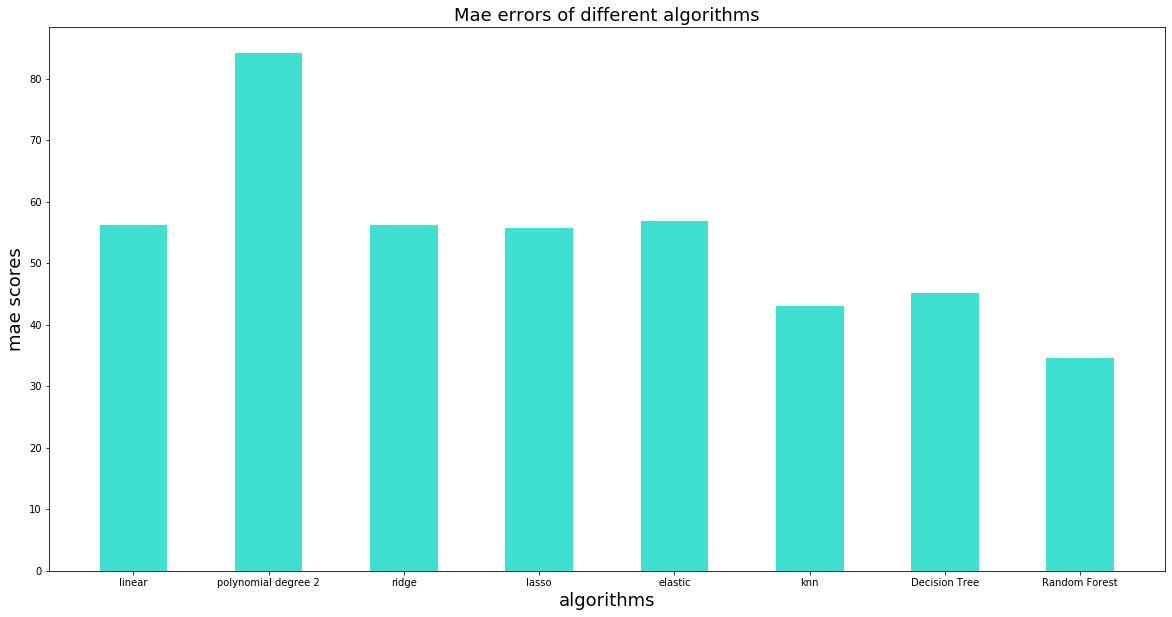

In [60]:
rmse_fig=plt.figure(figsize=(20,10))
plt.bar(models,maes,color='turquoise',width=0.5)
plt.title('Mae errors of different algorithms',fontsize=18)
plt.xlabel('algorithms',fontsize=18)
plt.ylabel('mae scores',fontsize=18)
plt.show()

#### Random Forest Regressor gives best results. 

# Saving the model

In [61]:
import pickle
# open a file, to store the data
#file = open('bengaluru_house_price_model.pkl', 'wb')

# dump information to that file
#pickle.dump(rfr_prices,file)


with open("bengaluru_house_price_model.pkl", "wb") as f:
    pickle.dump(rfr_prices, f)




In [62]:
#Rough
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.24.0.
